In [1]:
import pandas as pd
import numpy as np
import os

data_dir = 'C:/Users/Sakshee/Documents/DATASETS/Boschs Traffic Sign Recognition/images_gray'
category_names = os.listdir(data_dir)
num_classes = len(category_names)
print(num_classes)

images = []
for category in category_names:
    folder = data_dir + '/' + category
    images.append(len(os.listdir(folder)))

43


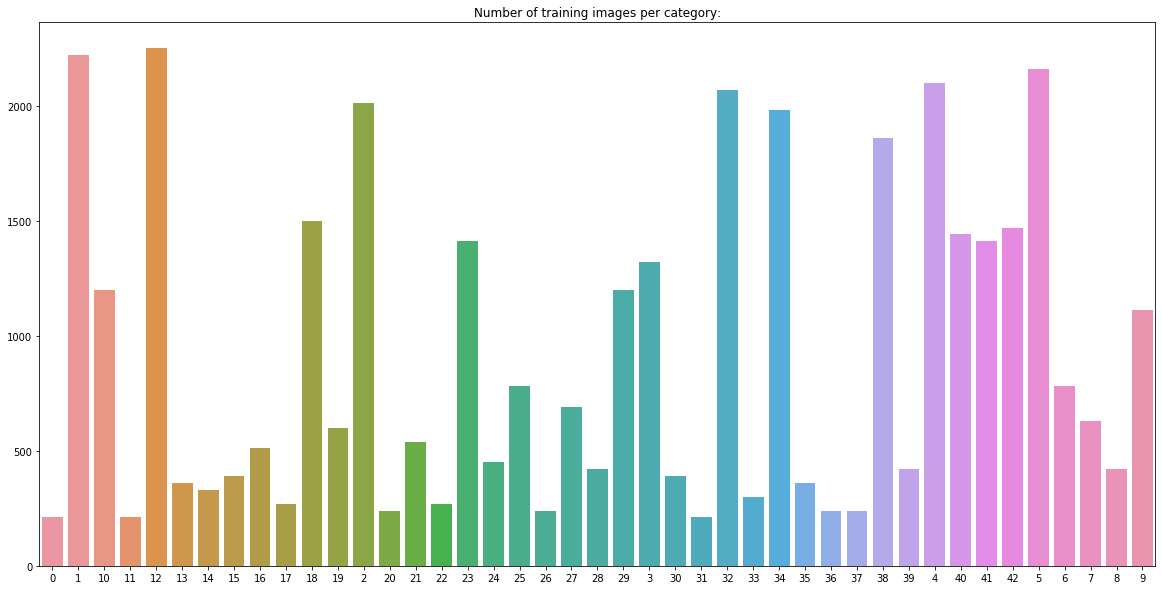

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
sns.barplot(category_names, images).set_title("Number of training images per category:")
plt.show()

In [10]:
from keras.preprocessing.image import img_to_array, load_img
from PIL import Image

data = []
labels = []
img_size = 50

for i in range(num_classes):
    path = os.path.join(data_dir, str(i))
    images = os.listdir(path)
    
    for a in images:
        image = Image.open(path + '/' + a)
        image = image.resize((img_size, img_size))
        image = np.array(image)
        data.append(image)
        labels.append(i)           

data = np.array(data)      
labels = np.array(labels) 

Using TensorFlow backend.


In [72]:
print(data.shape)
print(labels.shape)

(39209, 50, 50, 1)
(39209,)


In [73]:
data = data.reshape((39209, 50, 50, 1))

In [74]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(data, labels, test_size=0.2, random_state=42, shuffle=True)

X_train = X_train/255 
X_test = X_test/255

print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(31367, 50, 50, 1) (7842, 50, 50, 1) (31367,) (7842,)


In [75]:
import keras
from keras.utils import to_categorical

Y_train=keras.utils.to_categorical(Y_train, num_classes)
Y_test= keras.utils.to_categorical(Y_test, num_classes)

print(Y_train.shape)
print(Y_test.shape)

(31367, 43)
(7842, 43)


In [27]:
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(img_size, img_size, 1)))
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 48, 48, 32)        320       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 46, 46, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 21, 21, 64)        18496     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 19, 19, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 9, 9, 64)         

In [28]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [29]:
batch_size = 32
epochs = 15

history = model.fit(X_train, Y_train,batch_size=batch_size, epochs=epochs, validation_data=(X_test, Y_test) )

Train on 31367 samples, validate on 7842 samples
Epoch 1/15
31367/31367 [==============================] - 324s 10ms/step - loss: 0.9689 - accuracy: 0.7356 - val_loss: 0.0791 - val_accuracy: 0.9821
Epoch 2/15
31367/31367 [==============================] - 308s 10ms/step - loss: 0.1619 - accuracy: 0.9525 - val_loss: 0.0338 - val_accuracy: 0.9929
Epoch 3/15
31367/31367 [==============================] - 282s 9ms/step - loss: 0.0971 - accuracy: 0.9704 - val_loss: 0.0292 - val_accuracy: 0.9917
Epoch 4/15
31367/31367 [==============================] - 272s 9ms/step - loss: 0.0729 - accuracy: 0.9768 - val_loss: 0.0219 - val_accuracy: 0.9943
Epoch 5/15
31367/31367 [==============================] - 268s 9ms/step - loss: 0.0613 - accuracy: 0.9810 - val_loss: 0.0154 - val_accuracy: 0.9959
Epoch 6/15
31367/31367 [==============================] - 286s 9ms/step - loss: 0.0544 - accuracy: 0.9826 - val_loss: 0.0177 - val_accuracy: 0.9963
Epoch 7/15
31367/31367 [==============================] - 266

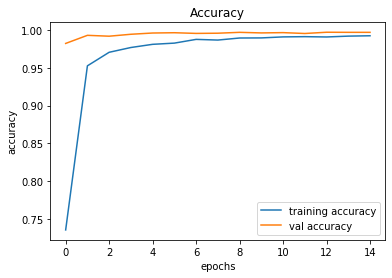

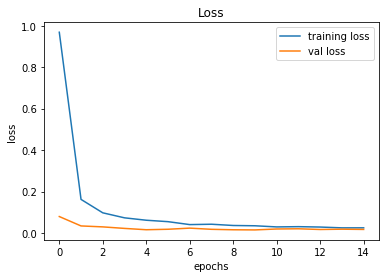

In [31]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [33]:
import pickle 

# saving the trained model as a pickle object
pickle_out = open("model.p", "wb")        # wb is write the bytes
pickle.dump(model, pickle_out)
pickle_out.close()

In [67]:
y_pred_val = model.predict(X_test)

In [68]:
y_pred_val = np.argmax(y_pred_val, axis=1)
y_pred_val

array([34, 24, 21, ...,  9,  7, 29], dtype=int64)

In [76]:
Y_test = np.argmax(Y_test, axis=1)
Y_test

array([34, 24, 21, ...,  9,  7, 29], dtype=int64)

In [77]:
print(y_pred_val.shape)
print(Y_test.shape)

(7842,)
(7842,)


In [78]:
matrix = multilabel_confusion_matrix(Y_test, y_pred_val, labels = category_names )    
matrix.shape

(43, 2, 2)

In [79]:
matrix

array([[[7804,    0],
        [   1,   37]],

       [[7340,    6],
        [   0,  496]],

       [[7623,    4],
        [   0,  215]],

       [[7800,    0],
        [   2,   40]],

       [[7421,    1],
        [   0,  420]],

       [[7785,    0],
        [   1,   56]],

       [[7775,    0],
        [   0,   67]],

       [[7785,    0],
        [   0,   57]],

       [[7734,    2],
        [   0,  106]],

       [[7781,    0],
        [   0,   61]],

       [[7514,    0],
        [   1,  327]],

       [[7720,    1],
        [   1,  120]],

       [[7443,    1],
        [   0,  398]],

       [[7782,    0],
        [   0,   60]],

       [[7739,    0],
        [   0,  103]],

       [[7788,    0],
        [   0,   54]],

       [[7546,    2],
        [   2,  292]],

       [[7756,    0],
        [   0,   86]],

       [[7686,    0],
        [   1,  155]],

       [[7808,    0],
        [   0,   34]],

       [[7689,    0],
        [   0,  153]],

       [[7763,    0],
        [   

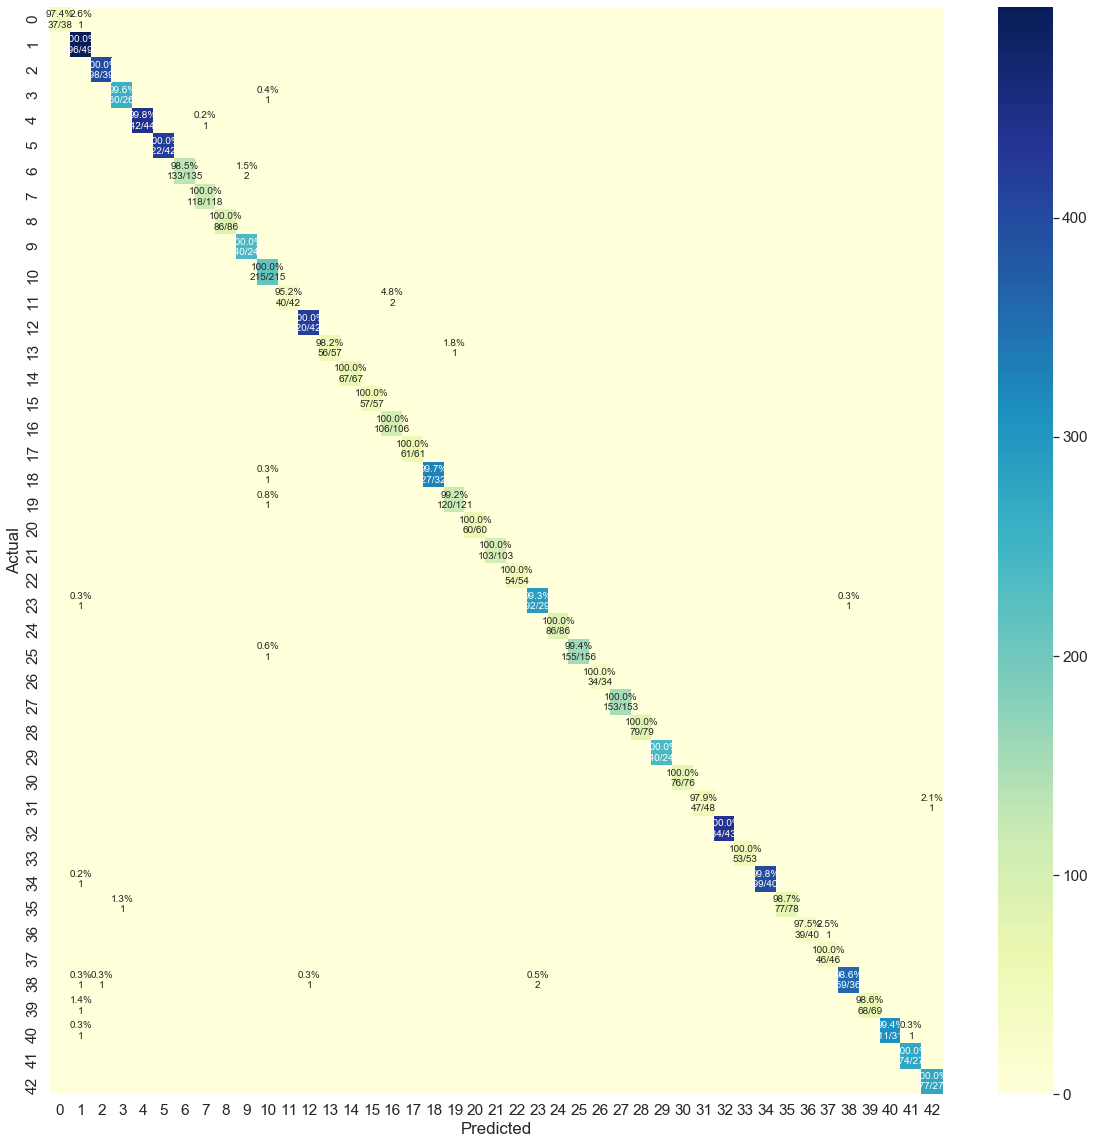

In [83]:
from sklearn.metrics import confusion_matrix

def plot_cm(Y_test, y_pred_val, figsize=(20,20)):
    cm = confusion_matrix(Y_test, y_pred_val, labels=np.unique(Y_test))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
                
            elif c == 0:
                annot[i, j] = ''
                
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
                
    cm = pd.DataFrame(cm, columns = np.unique(Y_test), index = np.unique(y_pred_val))
    
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, cmap= "YlGnBu", annot=annot, fmt='', ax=ax, annot_kws={"size": 10})
    
plot_cm(Y_test, y_pred_val)